## ❄️ Polar coordinates

Building a circular barplot requires using polar coordinates instead of the more usual cartesian coordinates. This kind of representation is accessible through the `polar` parameter of the `subplot()` function of `matplotlib`. Let's initialize a chart that uses polar coordinates:

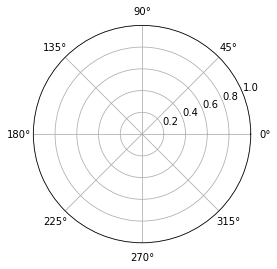

In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

# Initialize plot with polar coordinates.
plt.subplot(111, polar=True);



Now let's add a bar to this figure. This is gonna be done through the usual `bar()` function. The same usual parameter must be provided, but they have some different meanings:
- `x`: angle of the center of the section we're adding. 
- `height` and `bottom`: are a bit like the `ylim` values. They control the thickness of the section
- `width`: angle of the section

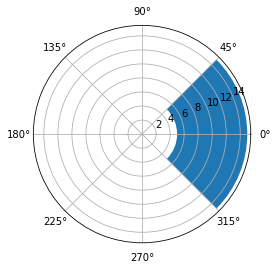

In [3]:
# import numpy to get the value of Pi
import numpy as np

# Add a bar in the polar coordinates
plt.subplot(111, polar=True);
plt.bar(x=0, height=10, width=np.pi/2, bottom=5);

>Note: angles are provided in radians. Remember that 0 degrees is 0 radians. 180 degrees is Pi radians. And so on.

## 📍 Data

Let's build a basic dataset with 2 columns. The first column provide a name for each item of the dataset. The second column provides a numeric value for the item:

In [4]:
# import pandas for data wrangling
import pandas as pd

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Show 3 first rows
df.head(3)


,Name,Value
0,item 1,25
1,item 2,42
2,item 3,13


## 📊 Circular Barplot

Let's build a very basic circular barplot from this dataset. Each item will be represented as a bar.

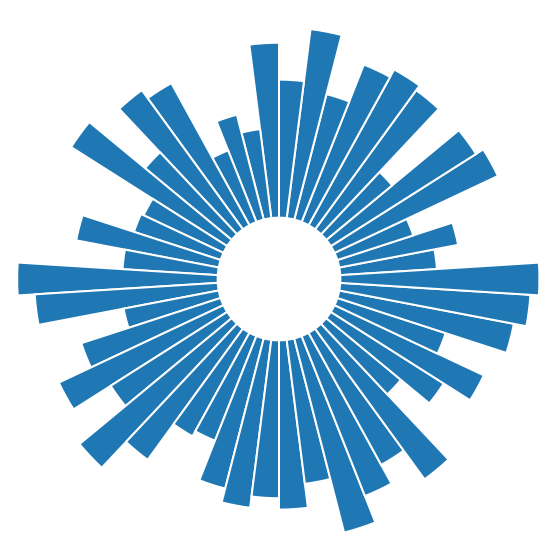

In [21]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")


## 🏷️ Add labels

The above chart looks not too bad, but is pretty useless without labels. Labels are pretty tricky to add and you have to remember some basic trigonometry concepts in order to get it right.

- the `text()` function has a handy `rotation` parameter. This parameter expect degrees, not radians. Fortunately, `numpy` has a handy `rad2deg()` function.
- labels must be flipped by 180 on the left side of the figure for readability. It also means that their alignment must be reversed (`ha` parameter)

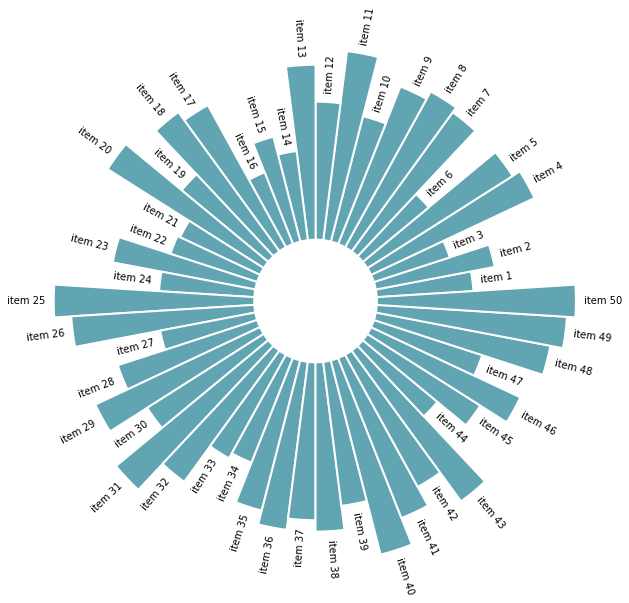

In [49]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


## ↕️ Reordering

Last but not least, a bar chart is always [more insightful when ordered](https://www.data-to-viz.com/caveat/order_data.html). It allows to understand each item rank much quicker. To do so, you simply have to reorder the initial dataframe with the `sort_values()` function and run the same code.

Let's check the complete code:

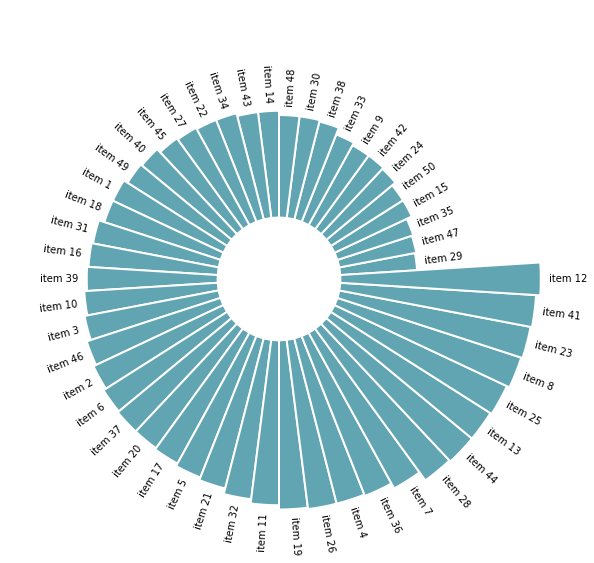

In [50]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 